# 0. Imports

In [1]:
# Basic imports
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Functional imports
import json
import pyarrow
from pickle import dump

# Model imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

# 1. Data Collection

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_2018 = pd.read_parquet("/workspace/final_project/data/raw/Combined_Flights_2018.parquet", engine="pyarrow")
df_2019 = pd.read_parquet("/workspace/final_project/data/raw/Combined_Flights_2019.parquet", engine="pyarrow")
df_2020 = pd.read_parquet("/workspace/final_project/data/raw/Combined_Flights_2020.parquet", engine="pyarrow")
df_2021 = pd.read_parquet("/workspace/final_project/data/raw/Combined_Flights_2021.parquet", engine="pyarrow")
df_2022 = pd.read_parquet("/workspace/final_project/data/raw/Combined_Flights_2022.parquet", engine="pyarrow")

In [4]:
data_frames = [df_2018, df_2019, df_2020, df_2021, df_2022]
df = pd.concat(data_frames, ignore_index=True)

In [5]:
df.head(3)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,0.0,38.0,62.0,59.0,145.0,2018,1,1,23,2,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8928A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,14.0,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1258.0,0.0,36.0,62.0,61.0,145.0,2018,1,1,24,3,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,13.0,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,1302.0,0.0,40.0,62.0,69.0,145.0,2018,1,1,25,4,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8836A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,18.0,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0


# 2.2 Exploration and Data cleaning

## Explicación de Columnas - Dataset de Vuelos

### Información del Vuelo
* **FlightDate**: Fecha del vuelo (año, mes y día)
* **Airline**: Código de aerolínea operadora
* **Origin**: Código IATA aeropuerto origen
* **Dest**: Código IATA aeropuerto destino

### Indicadores de Interrupción
* **Cancelled**: Vuelo cancelado (1=Sí, 0=No)
* **Diverted**: Vuelo desviado (1=Sí, 0=No)

### Horarios y Retrasos
#### Salida
* **CRSDepTime**: Hora programada salida
* **DepTime**: Hora real salida
* **DepDelayMinutes**: Minutos de retraso salida
* **DepDelay**: Retraso salida (negativo=anticipado)

#### Llegada
* **ArrTime**: Hora real llegada
* **ArrDelayMinutes**: Minutos retraso llegada 
* **ArrDelay**: Retraso llegada (negativo=anticipada)

### Duración
* **AirTime**: Minutos en aire
* **CRSElapsedTime**: Tiempo estimado total
* **ActualElapsedTime**: Tiempo real total

### Geografía y Tiempo
* **Distance**: Distancia en millas
* **Year**: Año del vuelo
* **Quarter**: Trimestre (1-4)
* **Month**: Mes (1-12)
* **DayofMonth**: Día del mes
* **DayOfWeek**: Día semana (1=Lunes, 7=Domingo)

### Información Aerolíneas
* **Marketing_Airline_Network**: Aerolínea vendedora
* **Operating_Airline**: Aerolínea operadora física
* **DOT_ID_Marketing_Airline**: ID DOT aerolínea marketing
* **IATA_Code_Marketing_Airline**: Código IATA aerolínea marketing
* **Flight_Number_Marketing_Airline**: Número vuelo marketing
* **DOT_ID_Operating_Airline**: ID DOT aerolínea operadora
* **IATA_Code_Operating_Airline**: Código IATA aerolínea operadora

### Aeronave
* **Tail_Number**: Matrícula única
* **Flight_Number_Operating_Airline**: Número vuelo operativo

### Aeropuerto Origen
* **OriginAirportID**: ID único
* **OriginAirportSeqID**: ID secuencia
* **OriginCityMarketID**: ID mercado ciudad
* **OriginCityName**: Nombre ciudad
* **OriginState**: Abreviación estado
* **OriginStateFips**: Código FIPS estado
* **OriginStateName**: Nombre estado
* **OriginWac**: Código WAC

### Aeropuerto Destino
* **DestAirportID**: ID único
* **DestAirportSeqID**: ID secuencia
* **DestCityMarketID**: ID mercado ciudad
* **DestCityName**: Nombre ciudad
* **DestState**: Abreviación estado
* **DestStateFips**: Código FIPS estado
* **DestStateName**: Nombre estado
* **DestWac**: Código WAC

### Indicadores Retraso Salida
* **DepDel15**: Retraso >15 min (1=Sí, 0=No)
* **DepartureDelayGroups**: Grupos de retraso
* **DepTimeBlk**: Bloque horario (ej: "0700-0759")

### Movimientos Aeronave
* **TaxiOut**: Minutos en pista antes despegue
* **WheelsOff**: Hora despegue
* **WheelsOn**: Hora aterrizaje
* **TaxiIn**: Minutos en pista post-aterrizaje

### Indicadores Retraso Llegada
* **CRSArrTime**: Hora programada llegada
* **ArrDel15**: Retraso >15 min (1=Sí, 0=No)
* **ArrivalDelayGroups**: Grupos de retraso
* **ArrTimeBlk**: Bloque horario llegada

### Otros Indicadores
* **DistanceGroup**: Grupos por distancia
* **DivAirportLandings**: Aterrizajes no programados

In [6]:
print('Our dataframe contains {} rows and it has {} features.'.format(len(df), df.shape[1]))

Our dataframe contains 29193782 rows and it has 61 features.


---

## 2.2 Eliminating Irrelevant Features and dealing with null values

Eliminaremos algunos features antes de continuar con nuestro EDA para ahorrar en recursos y tiempo

In [7]:
columnas_necesarias = [
   'FlightDate',
   'Airline',
   'Origin', 
   'Dest',
   'CRSDepTime',
   'Diverted',
   'DepTime',
   'DepDelayMinutes',
   'OriginAirportID',
   'OriginStateName',
   'DestStateName',
   'DestCityName',
   'DayOfWeek',
   'Month',
   'Distance'
]

In [8]:
df = df[columnas_necesarias]
df.head(3)

,FlightDate,Airline,Origin,Dest,CRSDepTime,Diverted,DepTime,DepDelayMinutes,OriginAirportID,OriginStateName,DestStateName,DestCityName,DayOfWeek,Month,Distance
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,1202,False,1157.0,0.0,10146,Georgia,Georgia,"Atlanta, GA",2,1,145.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,1202,False,1157.0,0.0,10146,Georgia,Georgia,"Atlanta, GA",3,1,145.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,1202,False,1153.0,0.0,10146,Georgia,Georgia,"Atlanta, GA",4,1,145.0


In [9]:
df.shape

(29193782, 15)

### Análisis de Variables Seleccionadas para Predicción de Retrasos en Vuelos

### Variables Temporales
- `FlightDate`: Base para análisis de patrones temporales
- `Month`, `DayOfWeek`: Capturan patrones estacionales y semanales
- `CRSDepTime`: Hora programada, afecta probabilidad de retrasos
- `DepTime`: Hora real de salida, necesaria para validación

### Variables Operativas
- `Airline`: Diferentes aerolíneas tienen distintos índices de puntualidad
- `Distance`: Factor crítico que afecta complejidad operativa
- `Diverted`: Indicador importante de interrupciones operativas
- `DepDelayMinutes`: Variable objetivo para predicción

### Variables Geográficas
- `Origin`, `Dest`: Identificadores de aeropuertos
- `OriginAirportID`: Identificador único para análisis consistente
- `OriginStateName`, `DestStateName`: Factores climatológicos regionales
- `DestCityName`: Patrones específicos de destinos urbanos

### Variables Excluidas y Razones
- Variables redundantes (ej: `DepDelay`, similar a `DepDelayMinutes`)
- Datos post-evento (ej: `ArrTime`, `AirTime`)
- Información detallada no predictiva (ej: `TailNumber`)
- Variables derivadas calculables desde las seleccionadas

## 2.3 Identifying Duplicated and Null Values

In [10]:
df.describe()

,FlightDate,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,DayOfWeek,Month,Distance
count,29193782,2.919378e+07,2.843213e+07,2.843070e+07,2.919378e+07,2.919378e+07,2.919378e+07,2.919378e+07
mean,2020-04-23 22:27:03.485606,1.326262e+03,1.329296e+03,1.278311e+01,1.267630e+04,3.974879e+00,6.327840e+00,7.797346e+02
min,2018-01-01 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00,1.013500e+04,1.000000e+00,1.000000e+00,1.600000e+01
25%,2019-03-18 00:00:00,9.180000e+02,9.200000e+02,0.000000e+00,1.129200e+04,2.000000e+00,3.000000e+00,3.540000e+02
50%,2020-02-08 00:00:00,1.320000e+03,1.323000e+03,0.000000e+00,1.288900e+04,4.000000e+00,6.000000e+00,6.260000e+02
75%,2021-07-17 00:00:00,1.730000e+03,1.736000e+03,5.000000e+00,1.405700e+04,6.000000e+00,9.000000e+00,1.014000e+03
max,2022-07-31 00:00:00,2.359000e+03,2.400000e+03,7.223000e+03,1.686900e+04,7.000000e+00,1.200000e+01,5.812000e+03
std,NaN,4.823463e+02,4.949750e+02,4.617337e+01,1.525445e+03,2.002314e+00,3.452305e+00,5.812739e+02


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   FlightDate       datetime64[us]
 1   Airline          object        
 2   Origin           object        
 3   Dest             object        
 4   CRSDepTime       int64         
 5   Diverted         bool          
 6   DepTime          float64       
 7   DepDelayMinutes  float64       
 8   OriginAirportID  int64         
 9   OriginStateName  object        
 10  DestStateName    object        
 11  DestCityName     object        
 12  DayOfWeek        int64         
 13  Month            int64         
 14  Distance         float64       
dtypes: bool(1), datetime64[us](1), float64(3), int64(4), object(6)
memory usage: 3.1+ GB


***Coclusion:***

Nuestro data frame contiene los siguientes tipos de datos:

- ``Booleanos`` --> 1
- ``Date time`` --> 1
- ``Float``     --> 3
- ``Integer``   --> 4
- ``String``    --> 6



In [12]:
df.isna().sum()[df.isna().sum()>0]

DepTime            761652
DepDelayMinutes    763084
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

***Conclusion:***

De aproximadamente 29M de filas se encontrarons solo 1,524,736 de valores nulos

Sabiendo estos numeros lo que haremos seremos eliminarlos para que no afecte en el analisis de datos. Esta decision fue tomada considerando que al ser un porcentaje bajo de filas no afectara al momento del analisis

---

## 3. Casting

### 3.1 Dividing our dataset into categorical, numerical and temporal 

In [15]:
# Understanding how many type of features we have
df['FlightDate'] = df['FlightDate'].astype('datetime64[ns]')

df.dtypes.unique()

array([dtype('<M8[ns]'), dtype('O'), dtype('int64'), dtype('bool'),
       dtype('float64')], dtype=object)

In [16]:
num = ["float64", "int64"]
cat = ['O', 'bool']
temp = ['datetime64']

df_num = df.select_dtypes(num)
df_cat = df.select_dtypes(cat)
df_temp = df.select_dtypes(temp)

In [17]:
#Numerical Dataframe
df_num.head(3)

,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,DayOfWeek,Month,Distance
0,1202,1157.0,0.0,10146,2,1,145.0
1,1202,1157.0,0.0,10146,3,1,145.0
2,1202,1153.0,0.0,10146,4,1,145.0


In [18]:
#Categorical Dataframe
df_cat.head(3)

,Airline,Origin,Dest,Diverted,OriginStateName,DestStateName,DestCityName
0,Endeavor Air Inc.,ABY,ATL,False,Georgia,Georgia,"Atlanta, GA"
1,Endeavor Air Inc.,ABY,ATL,False,Georgia,Georgia,"Atlanta, GA"
2,Endeavor Air Inc.,ABY,ATL,False,Georgia,Georgia,"Atlanta, GA"


In [19]:
#Temporal_Dataframe
df_temp.head(3)

,FlightDate
0,2018-01-23
1,2018-01-24
2,2018-01-25


---

## 4. Univariated Analysis

### 4.1 Categorical Variable Analysis 

In [20]:
df_cat.head()

,Airline,Origin,Dest,Diverted,OriginStateName,DestStateName,DestCityName
0,Endeavor Air Inc.,ABY,ATL,False,Georgia,Georgia,"Atlanta, GA"
1,Endeavor Air Inc.,ABY,ATL,False,Georgia,Georgia,"Atlanta, GA"
2,Endeavor Air Inc.,ABY,ATL,False,Georgia,Georgia,"Atlanta, GA"
3,Endeavor Air Inc.,ABY,ATL,False,Georgia,Georgia,"Atlanta, GA"
4,Endeavor Air Inc.,ABY,ATL,False,Georgia,Georgia,"Atlanta, GA"


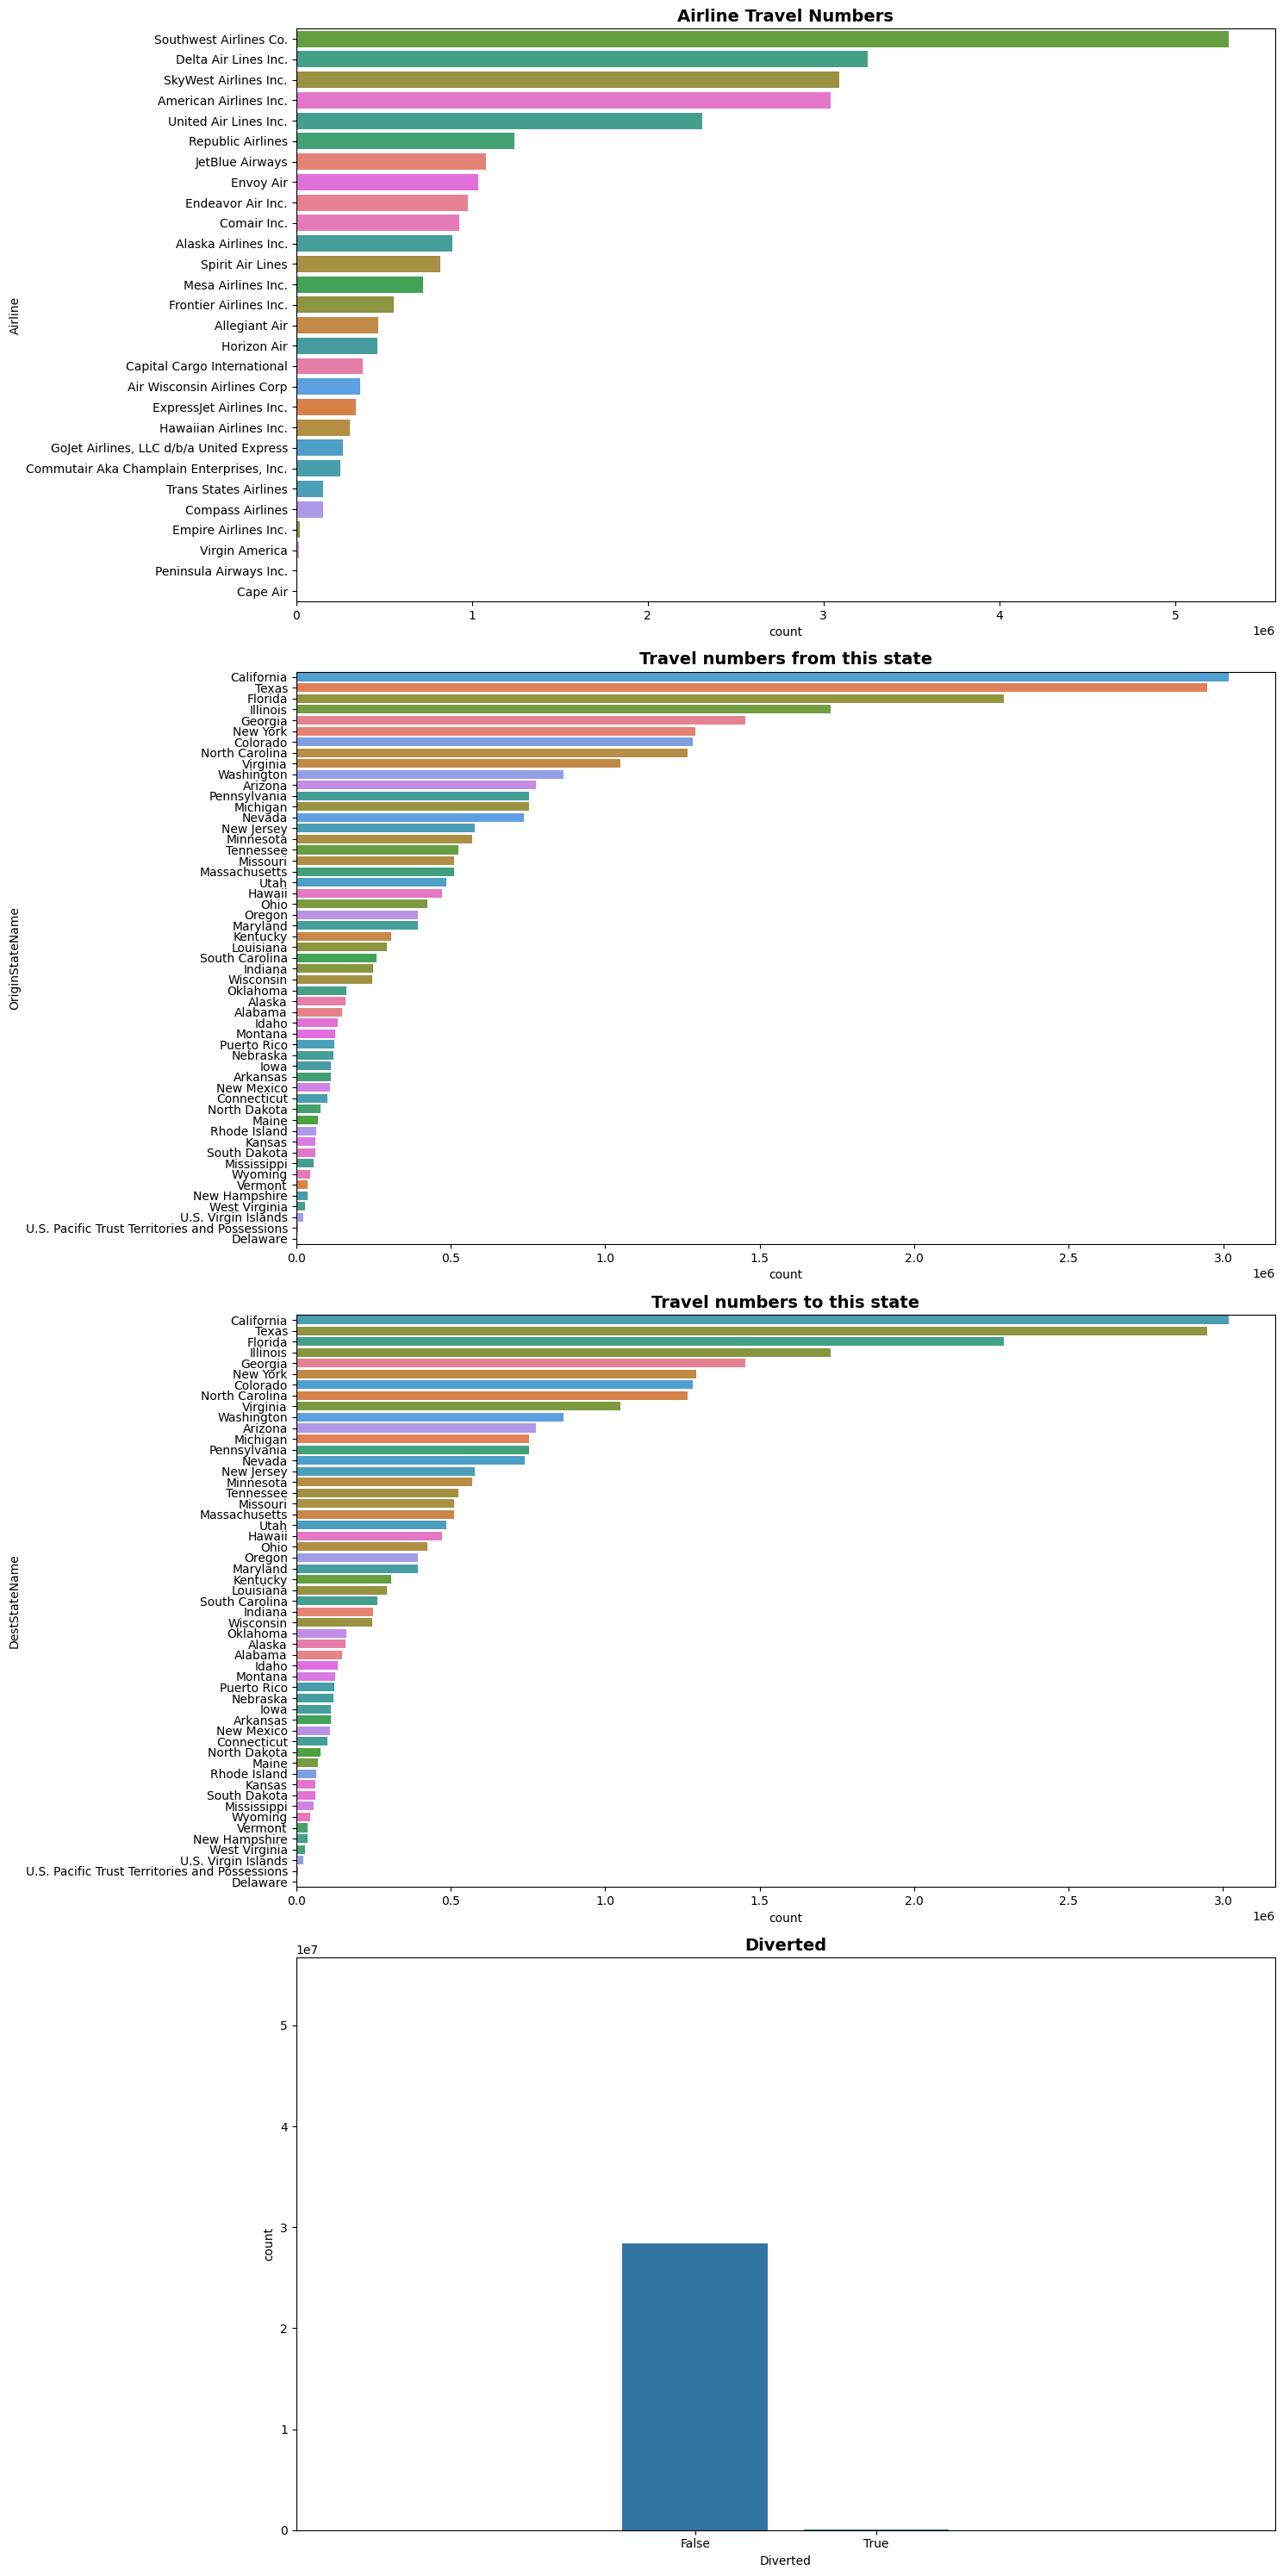

In [21]:
fig, ax = plt.subplots(nrows=4,ncols=1, figsize = (15,30))

sns.set_palette("husl")
sns.countplot(ax=ax[0], data=df_cat, y="Airline", order=df_cat["Airline"].value_counts().index, hue="Airline")
sns.countplot(ax=ax[1], data=df_cat, y="OriginStateName", order=df_cat["OriginStateName"].value_counts().index, hue="OriginStateName")
sns.countplot(ax=ax[2], data=df_cat, y="DestStateName", order=df_cat["DestStateName"].value_counts().index, hue="DestStateName")
sns.countplot(ax=ax[3], data=df_cat, x="Diverted")

ax[0].set_title("Airline Travel Numbers", fontsize=14, fontweight='bold')
ax[1].set_title("Travel numbers from this state", fontsize=14, fontweight='bold')
ax[2].set_title("Travel numbers to this state", fontsize=14, fontweight='bold')
ax[3].set_title("Diverted", fontsize=14, fontweight='bold')

plt.margins(y=1, x=1)
fig.subplots_adjust(hspace=1)
plt.tight_layout()
plt.show()

## 4.2 Numerical Variable Analysis

In [22]:
df_num.head()

,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,DayOfWeek,Month,Distance
0,1202,1157.0,0.0,10146,2,1,145.0
1,1202,1157.0,0.0,10146,3,1,145.0
2,1202,1153.0,0.0,10146,4,1,145.0
3,1202,1150.0,0.0,10146,5,1,145.0
4,1400,1355.0,0.0,10146,6,1,145.0


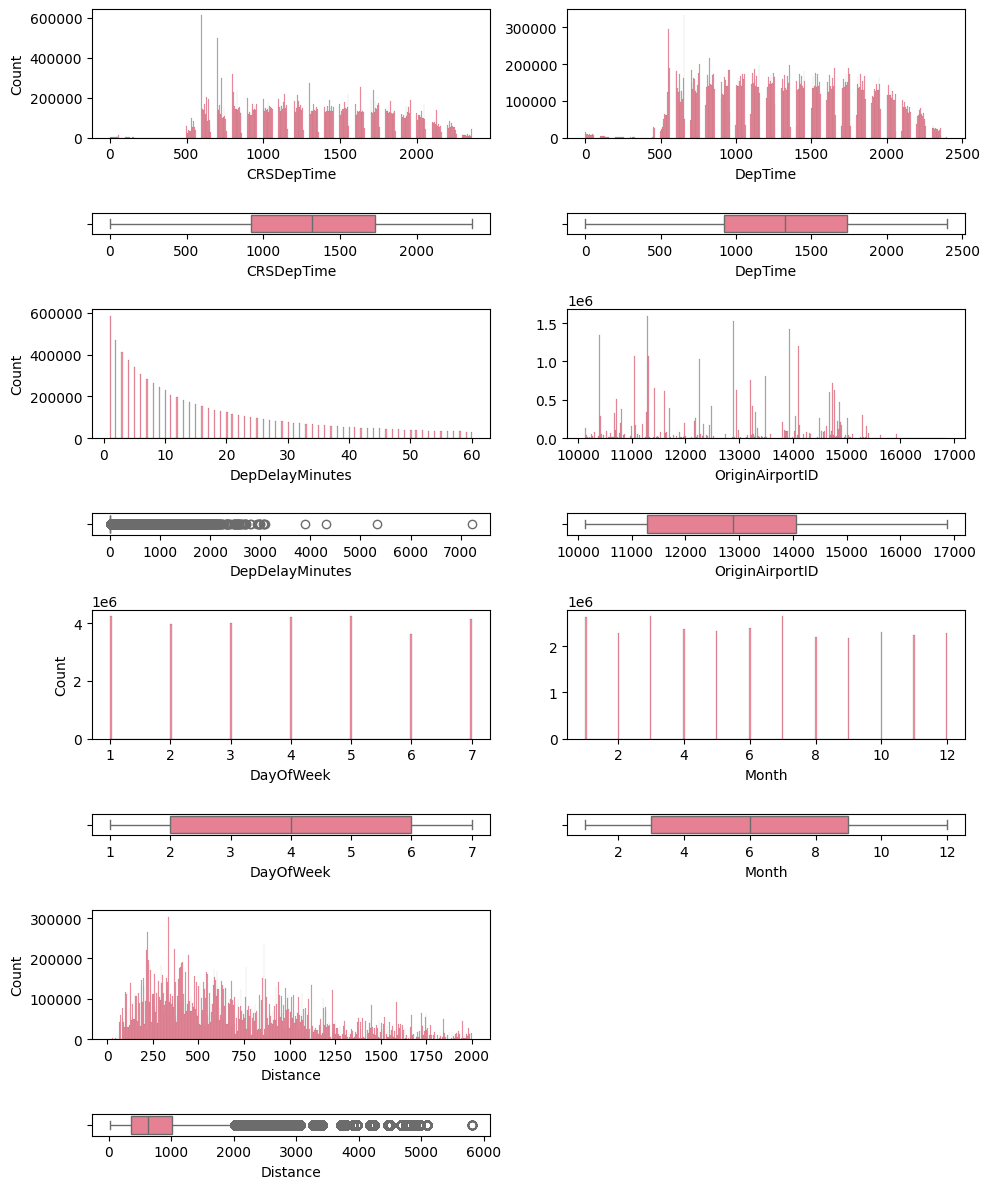

In [23]:
fig, ax = plt.subplots(8, 2, figsize=(10,12), gridspec_kw={"height_ratios":[6,1,6,1,6,1,6,1]})

#Row_1
sns.histplot(ax = ax[0,0], data=df_num, x="CRSDepTime")
sns.boxplot(ax = ax[1,0], data=df_num, x="CRSDepTime")
sns.histplot(ax = ax[0,1], data=df_num, x="DepTime").set(ylabel=None)
sns.boxplot(ax = ax[1,1], data=df_num, x="DepTime")

#Row_2
sns.histplot(ax = ax[2,0], data=df_num[(df_num["DepDelayMinutes"] >= 1) & (df_num["DepDelayMinutes"] <= 60)], x="DepDelayMinutes")
sns.boxplot(ax = ax[3,0], data=df_num, x="DepDelayMinutes")
sns.histplot(ax = ax[2,1], data=df_num, x="OriginAirportID").set(ylabel=None)
sns.boxplot(ax = ax[3,1], data=df_num, x="OriginAirportID")

#Row_3
sns.histplot(ax = ax[4,0], data=df_num, x="DayOfWeek")
sns.boxplot(ax = ax[5,0], data=df_num, x="DayOfWeek")
sns.histplot(ax = ax[4,1], data=df_num, x="Month").set(ylabel=None)
sns.boxplot(ax = ax[5,1], data=df_num, x="Month")

#Row_4
sns.histplot(ax = ax[6,0], data=df_num[df["Distance"] <= 2000], x="Distance")
sns.boxplot(ax = ax[7,0], data=df_num, x="Distance")

fig.delaxes(ax[6,1])
fig.delaxes(ax[7,1])
plt.tight_layout()
fig.subplots_adjust(hspace=1)
plt.show()

## 4.3 Multivariate Analysis

### 4.3.1 Analysis Categorical - Categorical

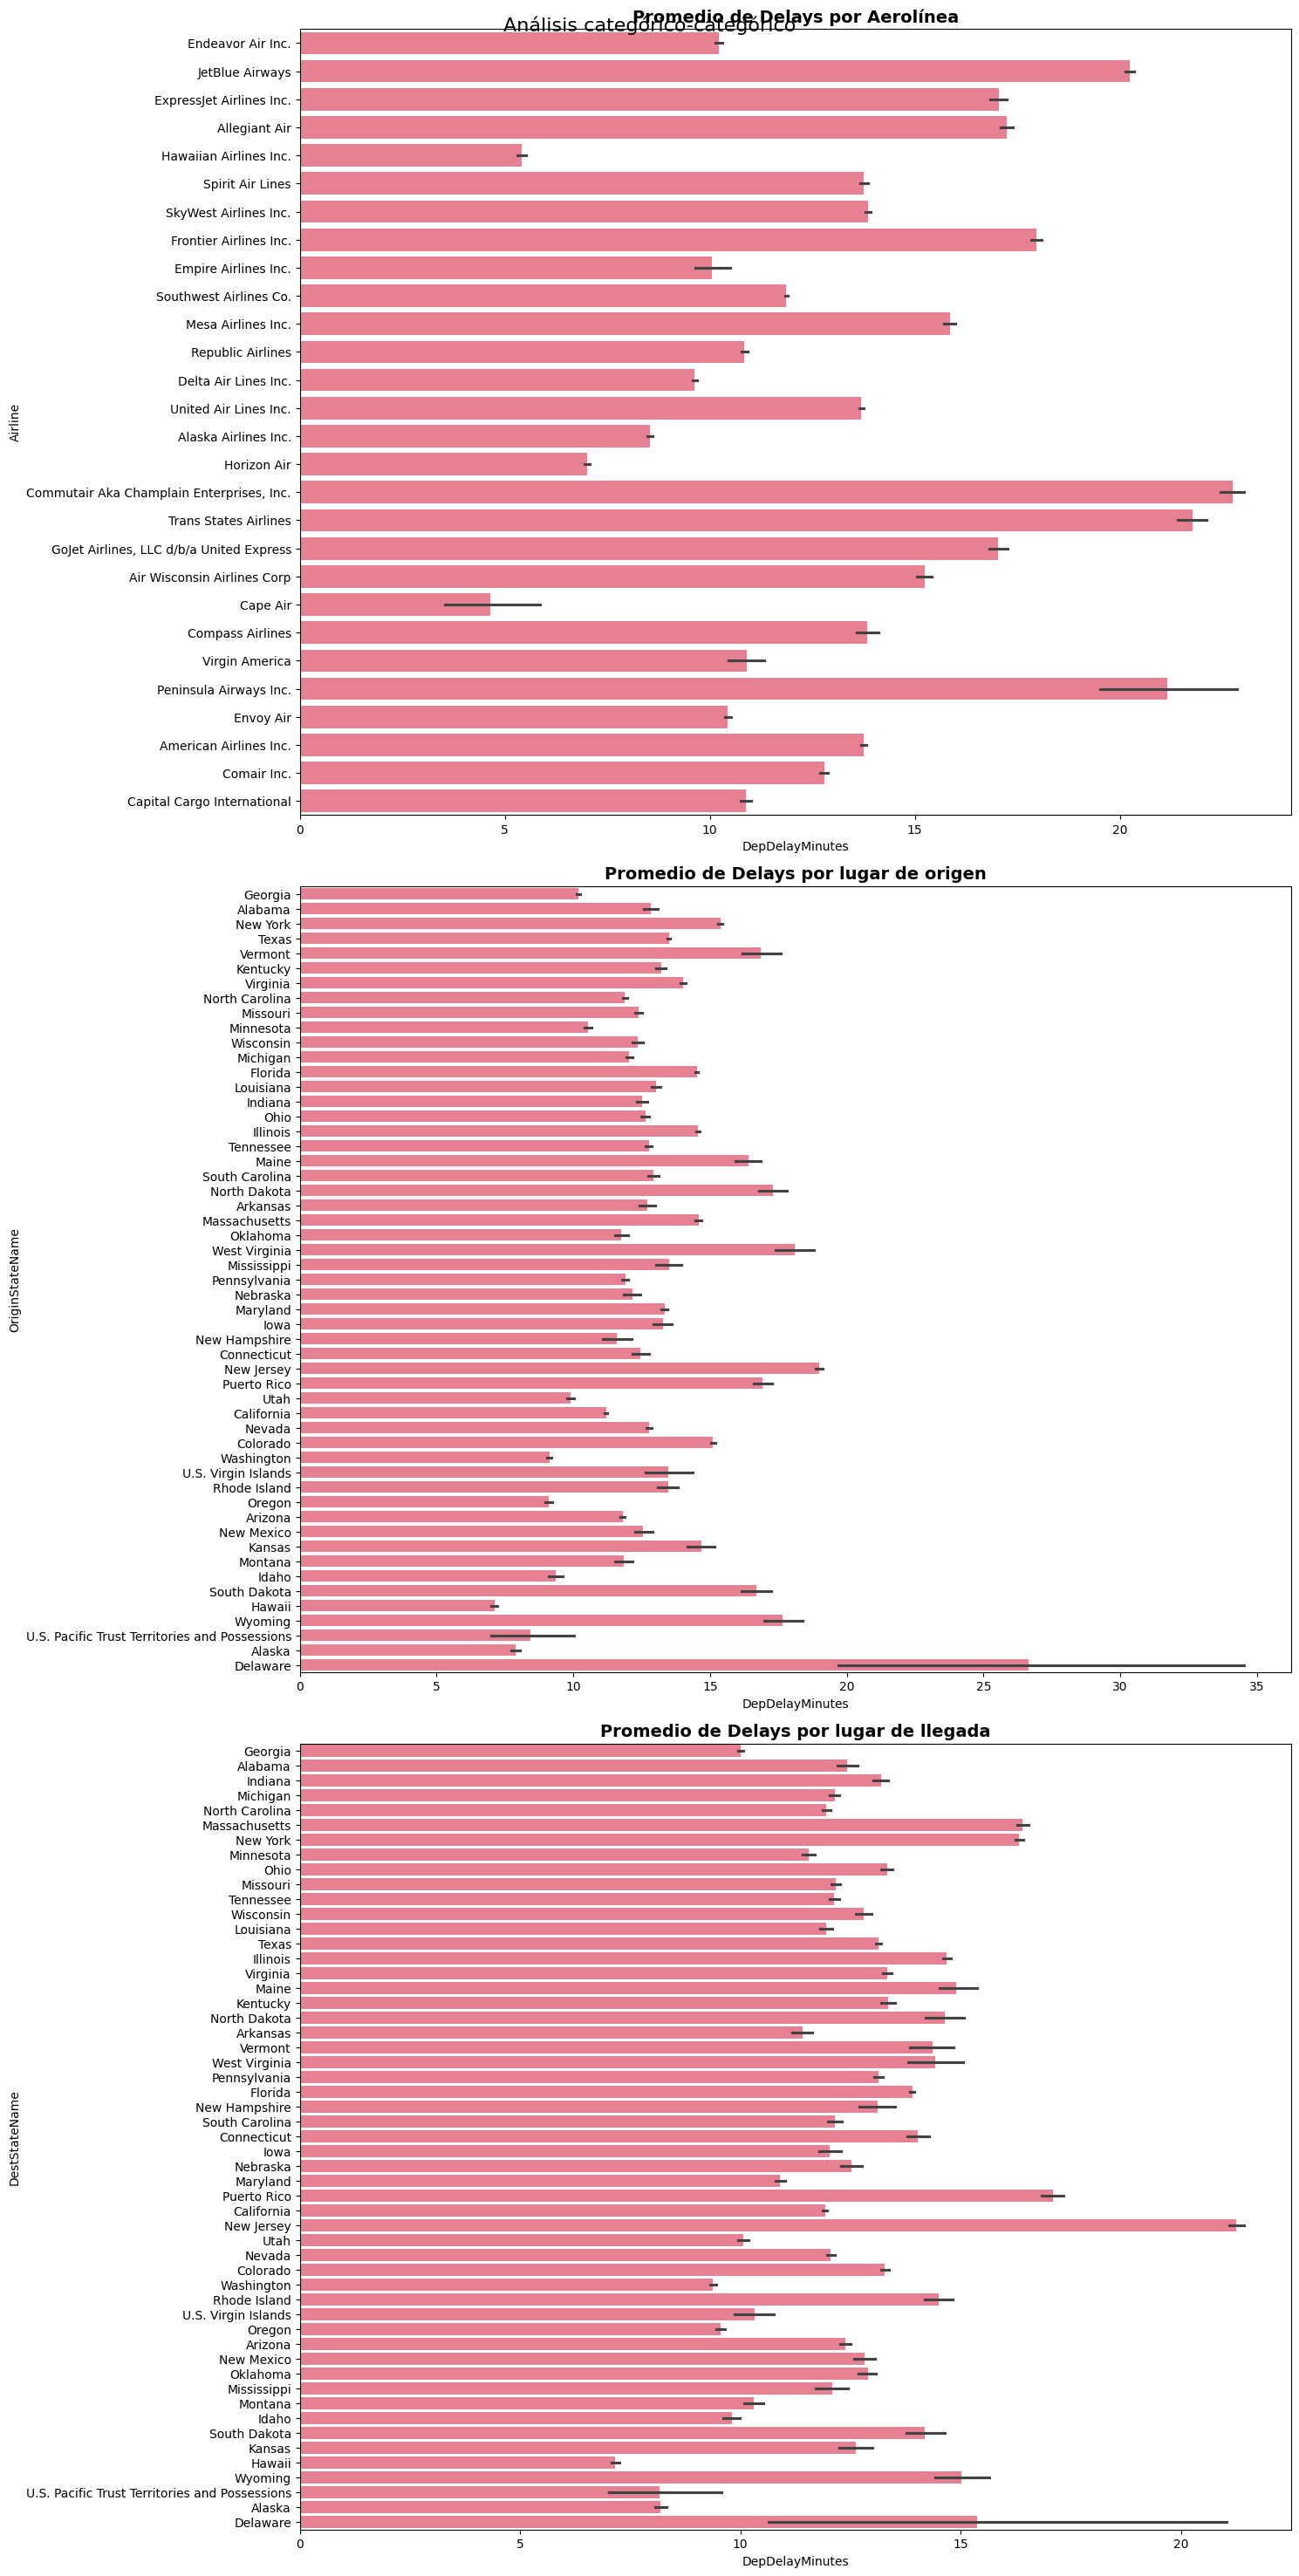

In [27]:
fig, axis = plt.subplots(3, 1, figsize = (15, 30))
fig.suptitle("Análisis categórico-categórico", fontsize=16)

sns.barplot(ax= axis[0], data=df, y='Airline', x='DepDelayMinutes', errorbar=('ci', 95))
sns.barplot(ax= axis[1], data=df, y='OriginStateName', x='DepDelayMinutes', errorbar=('ci', 95))
sns.barplot(ax= axis[2], data=df, y='DestStateName', x='DepDelayMinutes', errorbar=('ci', 95))

axis[0].set_title("Promedio de Delays por Aerolínea", fontsize=14, fontweight='bold')
axis[1].set_title("Promedio de Delays por lugar de origen", fontsize=14, fontweight='bold')
axis[2].set_title("Promedio de Delays por lugar de llegada", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.3.2 Analysis Numerical - Numerical


In [25]:
'''fig, axis = plt.subplots(4, 4, figsize = (14, 10))

sns.regplot(ax = axis[0, 0], data = df_num, x = "CRSDepTime", y = "DepDelayMinutes")
sns.heatmap(df_num[["DepDelayMinutes", "CRSDepTime"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_num, x = "DepTime", y = "DepDelayMinutes", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(df_num[["DepDelayMinutes", "DepTime"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df_num, x = "DepDelayMinutes", y = "DepDelayMinutes", color=sns.color_palette("colorblind")[3]).set(ylabel = None)
sns.heatmap(df_num[["DepDelayMinutes", "DepDelayMinutes"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

sns.regplot(ax = axis[0, 3], data = df_num, x = "OriginAirportID", y = "DepDelayMinutes", color=sns.color_palette("colorblind")[4]).set(ylabel = None)
sns.heatmap(df_num[["DepDelayMinutes", "OriginAirportID"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = df_num, x = "DayOfWeek", y = "DepDelayMinutes", color=sns.color_palette("colorblind")[5])
sns.heatmap(df_num[["DepDelayMinutes", "DayOfWeek"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = df_num, x = "Month", y = "DepDelayMinutes", color=sns.color_palette("colorblind")[6]).set(ylabel = None)
sns.heatmap(df_num[["DepDelayMinutes", "Month"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

sns.regplot(ax = axis[2, 2], data = df_num, x = "Distance", y = "DepDelayMinutes", color=sns.color_palette("colorblind")[7]).set(ylabel = None)
sns.heatmap(df_num[["DepDelayMinutes", "Distance"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2]).set(ylabel = None)

plt.margins(y=1, x=1)
fig.subplots_adjust(hspace=1)
plt.tight_layout()
plt.show()'''

'fig, axis = plt.subplots(4, 4, figsize = (14, 10))\n\nsns.regplot(ax = axis[0, 0], data = df_num, x = "CRSDepTime", y = "DepDelayMinutes")\nsns.heatmap(df_num[["DepDelayMinutes", "CRSDepTime"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)\n\nsns.regplot(ax = axis[0, 1], data = df_num, x = "DepTime", y = "DepDelayMinutes", color=sns.color_palette("colorblind")[2]).set(ylabel = None)\nsns.heatmap(df_num[["DepDelayMinutes", "DepTime"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])\n\nsns.regplot(ax = axis[0, 2], data = df_num, x = "DepDelayMinutes", y = "DepDelayMinutes", color=sns.color_palette("colorblind")[3]).set(ylabel = None)\nsns.heatmap(df_num[["DepDelayMinutes", "DepDelayMinutes"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)\n\nsns.regplot(ax = axis[0, 3], data = df_num, x = "OriginAirportID", y = "DepDelayMinutes", color=sns.color_palette("colorblind")[4]).set(ylabel = None)\nsns.heatmap(df_num[["DepDelayMinutes", "OriginAir

## 4.3.3 Numerical - Categorical analysis (Correlational Analysis)

In [53]:
df_enc = df.copy()
# Creating encoders for categorical features and saving them as JSON files. All files prefixed with 'enc'
# contain the encoding dictionaries for each categorical feature.

for column in df_cat.columns:
    
    if df_cat[column].dtype == bool:
        globals()[f"{column}_enc"] = {False: 0, True: 1}
    else:
        unique_values = list(df_cat[column].unique())
        globals()[f"{column}_enc"] = dict(zip(unique_values, range(len(unique_values))))

    json.dump(globals()[f"{column}_enc"], open(f'../data/interim/enc_{column}.json', 'w'))


In [54]:
# Replacing the values in our categorical features to our encoded values (numerical)
for column in df_cat.columns:
    df_enc[column] = df_enc[column].map(json.load(open(f'../data/interim/enc_{column}.json')))

In [42]:
df.head(3)

,FlightDate,Airline,Origin,Dest,CRSDepTime,Diverted,DepTime,DepDelayMinutes,OriginAirportID,OriginStateName,DestStateName,DestCityName,DayOfWeek,Month,Distance
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,1202,False,1157.0,0.0,10146,Georgia,Georgia,"Atlanta, GA",2,1,145.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,1202,False,1157.0,0.0,10146,Georgia,Georgia,"Atlanta, GA",3,1,145.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,1202,False,1153.0,0.0,10146,Georgia,Georgia,"Atlanta, GA",4,1,145.0


In [55]:
df_enc.head(3)

,FlightDate,Airline,Origin,Dest,CRSDepTime,Diverted,DepTime,DepDelayMinutes,OriginAirportID,OriginStateName,DestStateName,DestCityName,DayOfWeek,Month,Distance
0,2018-01-23,0,0,0,1202,NaN,1157.0,0.0,10146,0,0,0,2,1,145.0
1,2018-01-24,0,0,0,1202,NaN,1157.0,0.0,10146,0,0,0,3,1,145.0
2,2018-01-25,0,0,0,1202,NaN,1153.0,0.0,10146,0,0,0,4,1,145.0
